Chebychev polynomials, and their use in convergence proofs of $\mu$-strongly convex functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

#actual construction of k-th order Chebychev polynomial
def get_T(z,k):
    if k == 0:
        return z*0.+1.
    if k == 1:
        return z + 0.
    return get_T(z,k-1)*2.*z - get_T(z,k-2)

#scaled version used in convergence proof
def get_P(z,k,rho):
    return get_T(z/rho,k)/get_T(1./rho,k)
 


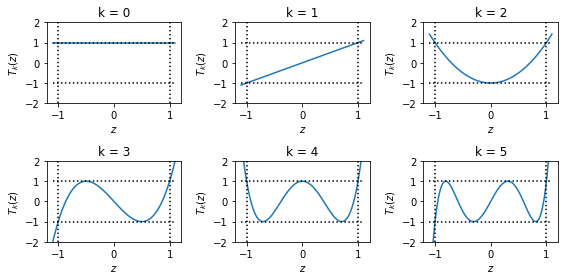

In [7]:
#plot Chebychev polynomials for k = 0,1,...,5
#dashed black lines form the box [-1,1] in both z and T_k(z)
    
z = np.linspace(-1.1,1.1,100)
plt.figure(figsize = (8,4))
for k in xrange(6):
    plt.subplot(2,3,k+1)
    plt.plot(z,get_T(z,k))
    plt.plot(z, z*0.+1,'k:')
    plt.plot(z, z*0.-1,'k:')
    plt.plot([-1,-1],[-2,2],'k:')
    plt.plot([1,1],[-2,2],'k:')
    plt.ylim([-2, 2])
    plt.xlabel('$z$')
    plt.ylabel('$T_k(z)$')
    plt.title('k = %d' % k)
plt.tight_layout()



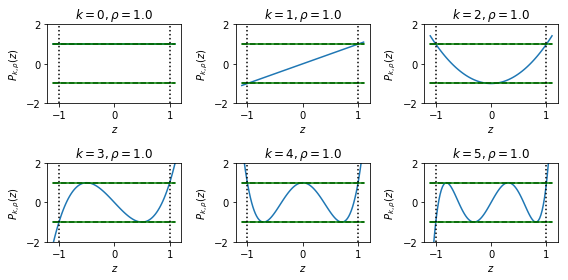

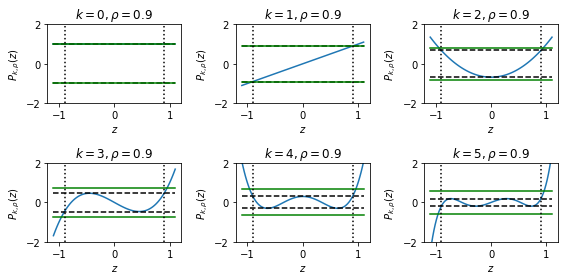

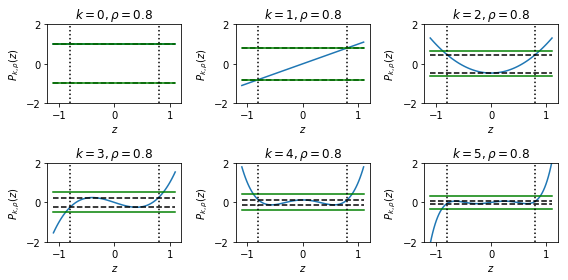

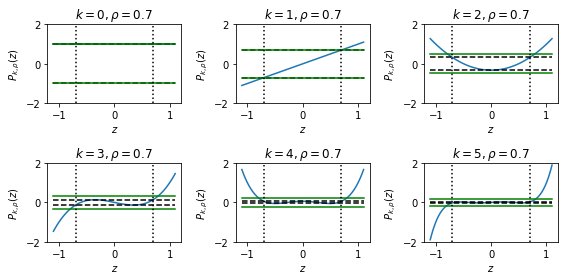

In [11]:
#plot scaled Chebychev polynomials for k = 0,1,...,5, for different values of rho
# Here, P_{k,rho}(z) = T_k(z/rho)/T_k(1/rho)
# dashed black lines form the box [-rho,rho] in z direction
# Horizontal black dashed lines show bound of P_k
# horizontal green lines show rho^k, which is the rate of convergence of unaccelerated gradient descent
 

for rho in [1.,.9,.8,.7]:
    plt.figure(figsize = (8,4))    
    for k in xrange(6):
        plt.subplot(2,3,k+1)
        plt.plot(z,get_P(z,k,rho))
        plt.plot(z, z*0.+1./get_T(1./rho,k),'k--')
        plt.plot(z, z*0.-1./get_T(1./rho,k),'k--')
        
        plt.plot(z, (rho**k)*np.ones(len(z)),'g')
        plt.plot(z, -(rho**k)*np.ones(len(z)),'g')
        
        plt.plot([-rho,-rho],[-2,2],'k:')
        plt.plot([rho,rho],[-2,2],'k:')
        plt.ylim([-2,2])
        plt.xlabel('$z$')
        plt.ylabel('$P_{k,\\rho}(z)$')
        plt.title('$k = %d, \\rho = %.1f$' % (k,rho))
    plt.tight_layout()